In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv',index_col=0)

In [11]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
# To  find missing values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [57]:
# No Null values found

In [14]:
# Check data type
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [12]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


To Check Cooreltion

In [17]:
dfcorr=df.corr()

In [18]:
dfcorr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


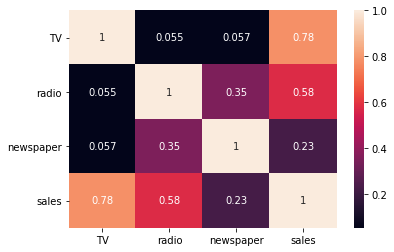

In [19]:
sns.heatmap(dfcorr,annot=True)

In [20]:
# Tv advertisement has high impact on sales whereas newspaper has lowest.

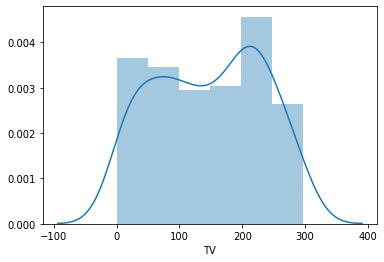

In [21]:
# To check distribution of skewness
sns.distplot(df['TV'])

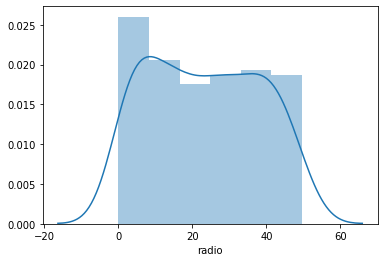

In [22]:
sns.distplot(df['radio'])

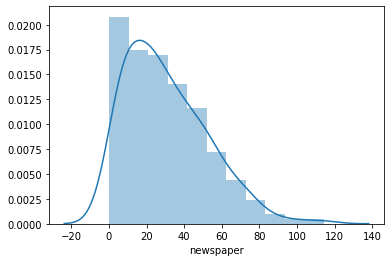

In [23]:
sns.distplot(df['newspaper'])

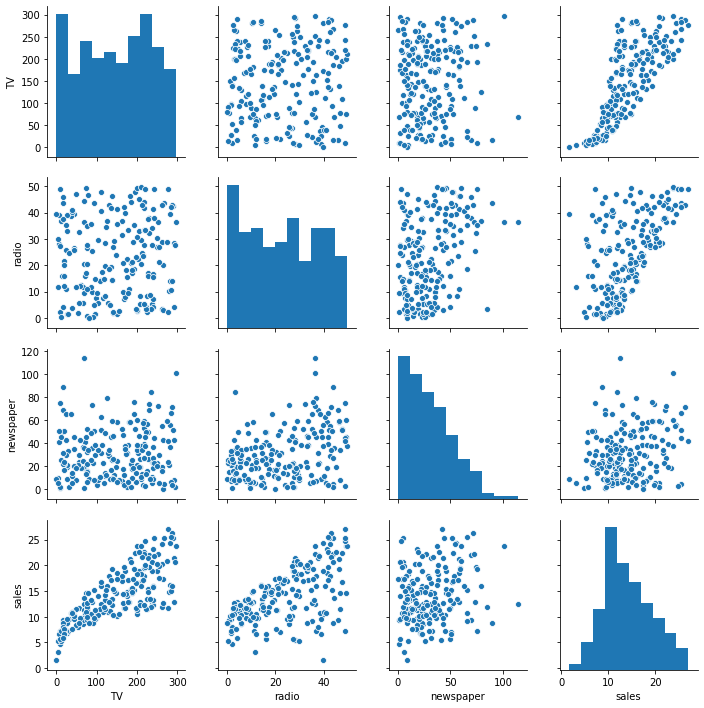

In [24]:
sns.pairplot(df)

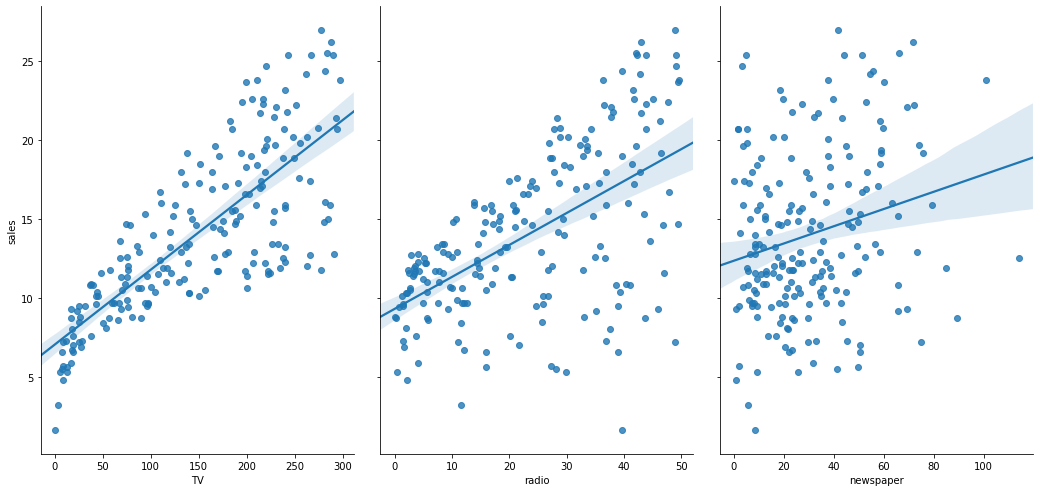

In [27]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [ ]:
# TV ads has strong impact on sales.

In [ ]:
# Nonegatively skewed data

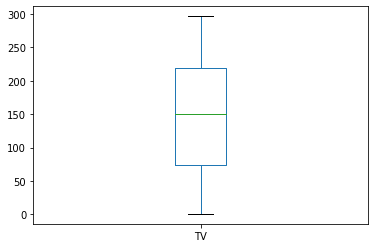

In [28]:
# Univariate analysis
# Lets check for columns
df['TV'].plot.box()

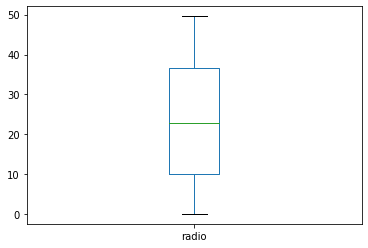

In [31]:
df['radio'].plot.box()

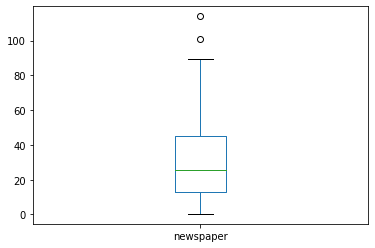

In [32]:
df['newspaper'].plot.box() # newspaper has outlier

In [78]:
# Bivariate analysis

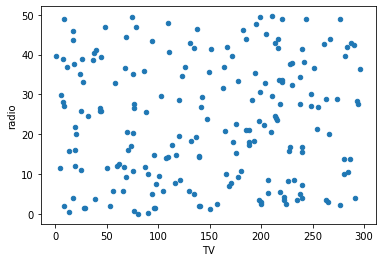

In [30]:
df.plot.scatter('TV','radio')

In [33]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [76]:
# Using z score method to remove outlier
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [77]:
df.shape,df1.shape

((200, 4), (198, 4))

In [78]:
# Checcking skewness of data
skw=df1.skew()
skw

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [79]:
df1.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [80]:
# We will separate target and rest columns
df_x=df1.drop(columns='sales')
y=df1['sales']

In [81]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [82]:
x.shape,y.shape

((198, 3), (198,))

In [83]:
x.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [85]:
# Finding best r_state
def maxr2_score(lr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        print('r2 score corresponding to random state',r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to ', final_r_state," is ",max_r_score)
    return final_r_state

In [86]:
# Lets use LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

r2 score corresponding to random state 42  is  0.8989454779619588
r2 score corresponding to random state 43  is  0.8751484803695657
r2 score corresponding to random state 44  is  0.8117000632290441
r2 score corresponding to random state 45  is  0.8747422037972019
r2 score corresponding to random state 46  is  0.8726271917983103
r2 score corresponding to random state 47  is  0.8922946750347811
r2 score corresponding to random state 48  is  0.866237899668671
r2 score corresponding to random state 49  is  0.8351144932670392
r2 score corresponding to random state 50  is  0.8429785403092693
r2 score corresponding to random state 51  is  0.8969749608189316
r2 score corresponding to random state 52  is  0.8925145995117169
r2 score corresponding to random state 53  is  0.8524939615808071
r2 score corresponding to random state 54  is  0.8776799027550092
r2 score corresponding to random state 55  is  0.8977109139390169
r2 score corresponding to random state 56  is  0.8436665154822788
r2 score co

In [87]:
# To find optimum value of n_neighbours for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 4}

In [88]:
# Lets use KNN regression model
knr=KNeighborsRegressor(n_neighbors=4)
r_state=maxr2_score(knr,x,y)


r2 score corresponding to random state 42  is  0.9357149671313382
r2 score corresponding to random state 43  is  0.9327876926693458
r2 score corresponding to random state 44  is  0.9267724536317711
r2 score corresponding to random state 45  is  0.9086023350161672
r2 score corresponding to random state 46  is  0.9021706810143139
r2 score corresponding to random state 47  is  0.9450754310751618
r2 score corresponding to random state 48  is  0.9273540269700297
r2 score corresponding to random state 49  is  0.9192521343277706
r2 score corresponding to random state 50  is  0.943788389154849
r2 score corresponding to random state 51  is  0.9210612630483748
r2 score corresponding to random state 52  is  0.9658710017369763
r2 score corresponding to random state 53  is  0.8957877746975467
r2 score corresponding to random state 54  is  0.9363433815179443
r2 score corresponding to random state 55  is  0.9328271051139083
r2 score corresponding to random state 56  is  0.8929406220782272
r2 score co

In [89]:
# using Lasso
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [90]:
# Lts check max r2 score 
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to random state 42  is  0.8980209932900431
r2 score corresponding to random state 43  is  0.8748274285562571
r2 score corresponding to random state 44  is  0.821964418062779
r2 score corresponding to random state 45  is  0.8790722914669622
r2 score corresponding to random state 46  is  0.8762496226404188
r2 score corresponding to random state 47  is  0.8957580511531971
r2 score corresponding to random state 48  is  0.8698158257018274
r2 score corresponding to random state 49  is  0.8368871187315301
r2 score corresponding to random state 50  is  0.8454831532120928
r2 score corresponding to random state 51  is  0.8998279979944519
r2 score corresponding to random state 52  is  0.8958286153769411
r2 score corresponding to random state 53  is  0.8518482932500415
r2 score corresponding to random state 54  is  0.876980803147764
r2 score corresponding to random state 55  is  0.8966769669622391
r2 score corresponding to random state 56  is  0.8415696924636991
r2 score cor

In [92]:
# we will use gradient boosting Technique
# for getting best prameters will use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_


{'learning_rate': 0.1, 'n_estimators': 500}

In [98]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to random state 42  is  0.9852889341357829
r2 score corresponding to random state 43  is  0.9735295972692902
r2 score corresponding to random state 44  is  0.9661374679355802
r2 score corresponding to random state 45  is  0.9732044556573224
r2 score corresponding to random state 46  is  0.9774773417707823
r2 score corresponding to random state 47  is  0.9739140550253667
r2 score corresponding to random state 48  is  0.9772989019224192
r2 score corresponding to random state 49  is  0.9735323603353274
r2 score corresponding to random state 50  is  0.9835283698642073
r2 score corresponding to random state 51  is  0.9829909114383911
r2 score corresponding to random state 52  is  0.9872527357318412
r2 score corresponding to random state 53  is  0.9630568481587466
r2 score corresponding to random state 54  is  0.9856103637126326
r2 score corresponding to random state 55  is  0.9888161166550471
r2 score corresponding to random state 56  is  0.9674835442464315
r2 score c

In [94]:
# Use adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],'base_estimator':[lr,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [95]:
Dt=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor(base_estimator=Dt,learning_rate=1,n_estimators=500)
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to random state 42  is  0.9743484336230004
r2 score corresponding to random state 43  is  0.9730131075577894
r2 score corresponding to random state 44  is  0.95133356642875
r2 score corresponding to random state 45  is  0.9637628990450402
r2 score corresponding to random state 46  is  0.9752981252090719
r2 score corresponding to random state 47  is  0.9633169287994574
r2 score corresponding to random state 48  is  0.9693445248446012
r2 score corresponding to random state 49  is  0.9771479524830656
r2 score corresponding to random state 50  is  0.9803075874826715
r2 score corresponding to random state 51  is  0.960678610764933
r2 score corresponding to random state 52  is  0.9837192852766237
r2 score corresponding to random state 53  is  0.9580720370345449
r2 score corresponding to random state 54  is  0.9839331348038762
r2 score corresponding to random state 55  is  0.979892724282739
r2 score corresponding to random state 56  is  0.9744008959686411
r2 score corre

In [ ]:
# GradientBoostingRegressor and Decision Tree Regressor are the best model

In [97]:
# lets check cross val score
from sklearn.model_selection import cross_val_score
print("Mean r2 score",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())

Mean r2 score 0.9757847454940421


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=74)

In [100]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)


In [101]:
print("r2 score",r2_score(y_test,pred))

r2 score 0.9897138318977678


In [102]:
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,pred)))

RMSE is :  0.6268423760013895


In [103]:
from sklearn.externals import joblib

In [104]:
joblib.dump(gbr,"sales_predict.pkl")

['sales_predict.pkl']

In [105]:
a=[pred,y_test]

In [106]:
a

[array([19.79772981, 10.03566519, 21.71039905, 20.50709658, 14.96697664,
         6.95951679, 16.30369411, 11.07917717, 14.2538927 , 21.79656756,
        15.66634624, 12.52303264, 18.80791168, 25.46763608, 21.90049323,
         5.74173239, 14.95459163, 19.73111586, 25.2869774 , 19.62092212,
        13.10599864, 11.16202124, 11.89870135,  4.90714905, 11.72310042,
        14.66372998, 14.0158442 , 23.75497665, 21.58187753, 25.51212075,
        11.06899534, 20.26584026,  6.06096885, 22.50665547,  9.86131243,
        11.61397096,  7.93172636, 21.04862026,  7.2338646 , 19.1445069 ]),
 177    20.2
 139     9.6
 48     23.2
 125    19.7
 104    14.7
 120     6.6
 195    17.3
 74     11.0
 103    14.8
 186    22.6
 24     15.5
 95     11.5
 71     18.3
 99     25.4
 112    21.8
 133     5.7
 86     15.2
 143    20.1
 148    25.4
 69     18.9
 162    13.3
 123    11.6
 136    11.6
 156     3.2
 168    12.2
 163    14.9
 113    14.1
 18     24.4
 53     22.6
 184    26.2
 19     11.3
 194    19.